## Importar Librerias

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Cargar Datos

In [2]:
ds = pd.read_csv("Cleaned-Data.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

## Limpieza de datos

In [3]:
ds.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [4]:
ds.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

## Selección de datos

In [5]:
feature_cols = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing']

objetive_col1 = 'Severity_None'
objetive_col2 = 'Severity_Mild'
objetive_col3 = 'Severity_Moderate'
objetive_col4 = 'Severity_Severe'

X = ds[feature_cols]
y1 = ds[objetive_col1]
y2 = ds[objetive_col2]
y3 = ds[objetive_col3]
y4 = ds[objetive_col4]

## generar los datos de entrenamiento y pruebas

In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.3, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.3, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size = 0.3, random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size = 0.3, random_state=0)

## datos de rendimiento

In [7]:
def perform(y_test, y_pred, name_cols):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print('')
    print(confusion_matrix(y_test, y_pred), '\n')
    cm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred))
    cm.plot()

## K-Nearest Neighbors

### y1: Severity_None

In [8]:
knn = KNeighborsClassifier(n_neighbors = 10) #setting up the KNN model to use 10NN
knn.fit(X_train1, y_train1) #fitting the KNN

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train1, y_train1)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test1, y_test1)))

Accuracy of K-NN classifier on training set: 0.75
Accuracy of K-NN classifier on test set: 0.75


Precision :  0.23694029850746268
Recall :  0.005361364403917595
Accuracy :  0.7477904040404041
F1 Score :  0.010485468956406868

[[70943   409]
 [23561   127]] 



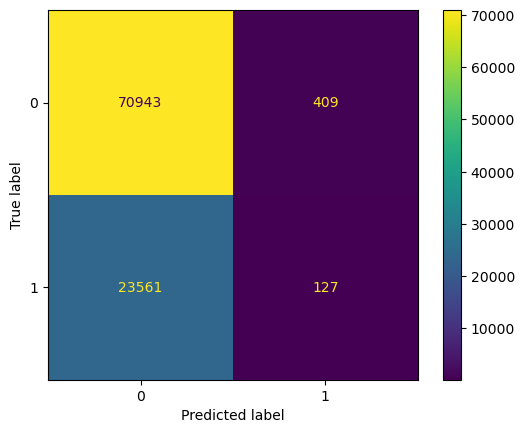

In [9]:
y_pred_knn = knn.predict(X_test1)
perform(y_test1, y_pred_knn, objetive_col1)

In [10]:
print(classification_report(y_test1, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.99      0.86     71352
           1       0.24      0.01      0.01     23688

    accuracy                           0.75     95040
   macro avg       0.49      0.50      0.43     95040
weighted avg       0.62      0.75      0.64     95040



### y2: Severity_Mild

In [11]:
knn.fit(X_train2, y_train2) #fitting the KNN

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train2, y_train2)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test2, y_test2)))

Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.74


Precision :  0.2563718140929535
Recall :  0.028815772844083078
Accuracy :  0.7365635521885522
F1 Score :  0.05180836962696459

[[69319  1984]
 [23053   684]] 



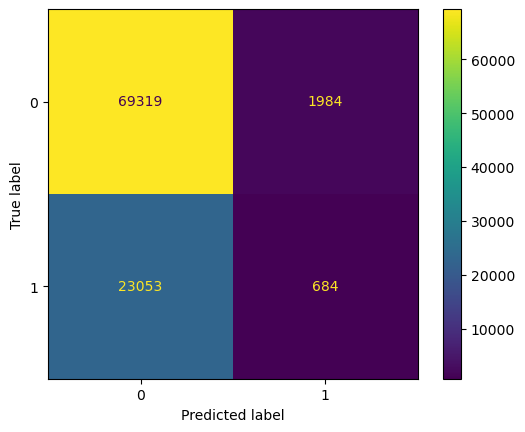

In [12]:
y_pred_knn = knn.predict(X_test2)
perform(y_test2, y_pred_knn, objetive_col2)

In [13]:
print(classification_report(y_test2, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85     71303
           1       0.26      0.03      0.05     23737

    accuracy                           0.74     95040
   macro avg       0.50      0.50      0.45     95040
weighted avg       0.63      0.74      0.65     95040



### y3: Severity_Moderate

In [14]:
knn.fit(X_train3, y_train3) #fitting the KNN

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train3, y_train3)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test3, y_test3)))

Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.74


Precision :  0.23450134770889489
Recall :  0.010952121186689605
Accuracy :  0.7430345117845117
F1 Score :  0.020926876202694032

[[70357   852]
 [23570   261]] 



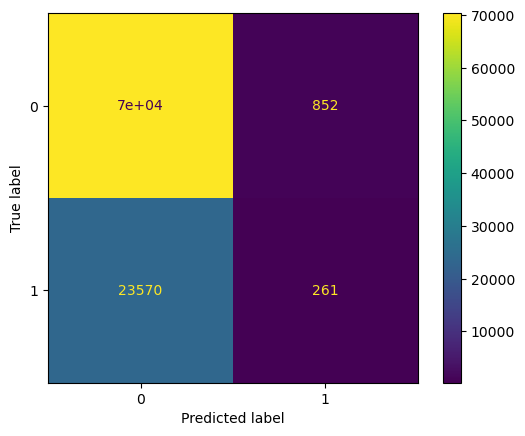

In [15]:
y_pred_knn = knn.predict(X_test3)
perform(y_test3, y_pred_knn, objetive_col3)

In [16]:
print(classification_report(y_test3, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85     71209
           1       0.23      0.01      0.02     23831

    accuracy                           0.74     95040
   macro avg       0.49      0.50      0.44     95040
weighted avg       0.62      0.74      0.64     95040



### y4: Severity_Severe

In [17]:
knn.fit(X_train4, y_train4) #fitting the KNN

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train4, y_train4)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test4, y_test4)))

Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.73


Precision :  0.2480477721635278
Recall :  0.045408678102926335
Accuracy :  0.7266624579124579
F1 Score :  0.07676451773402516

[[67982  3274]
 [22704  1080]] 



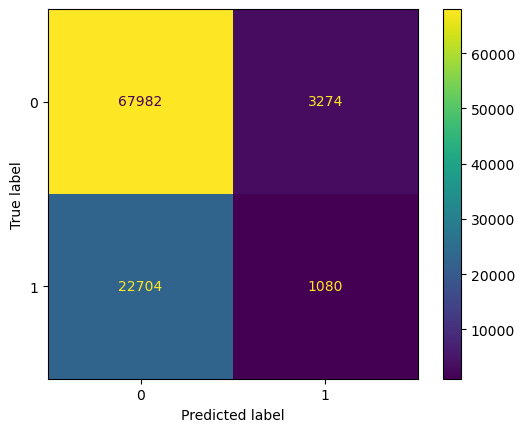

In [18]:
y_pred_knn = knn.predict(X_test4)
perform(y_test4, y_pred_knn, objetive_col4)

In [19]:
print(classification_report(y_test4, y_pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84     71256
           1       0.25      0.05      0.08     23784

    accuracy                           0.73     95040
   macro avg       0.50      0.50      0.46     95040
weighted avg       0.62      0.73      0.65     95040



## Mejoramiento de precisión del resultado

#### Aplicar Scaler

In [20]:
#scaler
scaler = MinMaxScaler()
ds[feature_cols] = scaler.fit_transform(ds[feature_cols])

#### Generar nuevamente los sets de entrenamiento y pruebas (Severity_None)

In [21]:
ds1 = ds.drop(['Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'None_Sympton','Severity_Mild', 'Severity_Moderate', 'Severity_Severe'], axis = 1, inplace = False)
ds1.info()
train, test = train_test_split(ds1, test_size = 0.3, random_state=0)
X_train = train.iloc[:, :19].values
X_test = test.iloc[:, :19].values
y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Fever                    316800 non-null  float64
 1   Tiredness                316800 non-null  float64
 2   Dry-Cough                316800 non-null  float64
 3   Difficulty-in-Breathing  316800 non-null  float64
 4   Sore-Throat              316800 non-null  float64
 5   Pains                    316800 non-null  float64
 6   Nasal-Congestion         316800 non-null  float64
 7   Runny-Nose               316800 non-null  float64
 8   Diarrhea                 316800 non-null  float64
 9   Severity_None            316800 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 24.2 MB


#### estimar parámetros

In [22]:
param_grid_knn = {
    'n_neighbors': [2, 5, 10, 15],                                   
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],          
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
}

kNNModel_grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, verbose=1, cv=10, n_jobs=-1)

kNNModel_grid.fit(X_train, y_train)
print(kNNModel_grid.best_estimator_)

#### Generar de nuevo el clasificador KNN a partir de los parámetros calculados

In [23]:
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2) #setting up the KNN model to use 2NN - alg "ball-tree"
knn.fit(X_train, y_train) #fitting the KNN

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2)

#### validar rendimiento del modelo

In [24]:
#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

[[71352     0]
 [    0 23688]] 



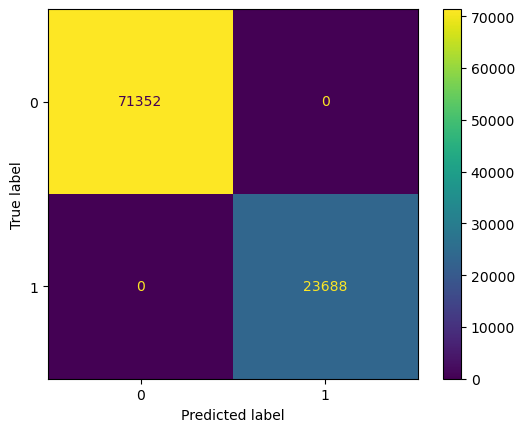

In [26]:
y_pred_knn = knn.predict(X_test)
perform(y_test, y_pred_knn, 'Severity_None')

In [27]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71352
           1       1.00      1.00      1.00     23688

    accuracy                           1.00     95040
   macro avg       1.00      1.00      1.00     95040
weighted avg       1.00      1.00      1.00     95040

